In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

	0WRO, ACZ-912, 4764383367, 358077093312524

In [2]:
flh=pd.read_csv('/home/jlhb1984/py-projects/data/ransa/Fuel Levels History Changes.csv')
flh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Textbox72     640 non-null    object
 1   Textbox36     640 non-null    object
 2   Textbox7      640 non-null    object
 3   UTC_DateTime  640 non-null    object
 4   EventName     640 non-null    object
 5   Textbox3      640 non-null    object
 6   Textbox5      640 non-null    object
 7   Altitude      640 non-null    object
 8   Address2      640 non-null    object
dtypes: object(9)
memory usage: 45.1+ KB


In [3]:
fuel_raw_data=pd.read_csv('/home/jlhb1984/py-projects/data/ransa/Export.csv',sep=';',encoding='latin1')
fuel_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  6312 non-null   object
 1   Message  6312 non-null   object
 2   Status   6312 non-null   object
dtypes: object(3)
memory usage: 148.1+ KB


In [4]:
fuel_raw_data_3e0=fuel_raw_data[fuel_raw_data['Message'].str.contains('3E0')]
fuel_raw_data_3e0['Tank1']='0'
fuel_raw_data_3e0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 4 to 6309
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  2776 non-null   object
 1   Message  2776 non-null   object
 2   Status   2776 non-null   object
 3   Tank1    2776 non-null   object
dtypes: object(4)
memory usage: 108.4+ KB


/tmp/ipykernel_16181/4010453225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_raw_data_3e0['Tank1']='0'


In [5]:
fuel_raw_data_3e0.to_csv('/home/jlhb1984/py-projects/data/ransa/fuel_raw_data.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 2722 entries, 0 to 2774
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2722 non-null   int64 
 1   Created     2722 non-null   object
 2   Message     2722 non-null   object
 3   Status      2722 non-null   object
 4   Tank1       2722 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2722 entries, 0 to 2774
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2722 non-null   int64 
 1   Created     2722 non-null   object
 2   Message     2722 non-null   object
 3   Status      2722 non-null   object
 4   Tank1       2722 non-null   object
 5   Tank1_dec   2722 non-null   object
dtypes: int64(1), object(5)
memory usage: 148.9+ KB
[22, 201, 321, 280, 465, 3257, 335, 328, 264, 309, 329, 395, 42, 332, 173, 160, 164, 153, 586,

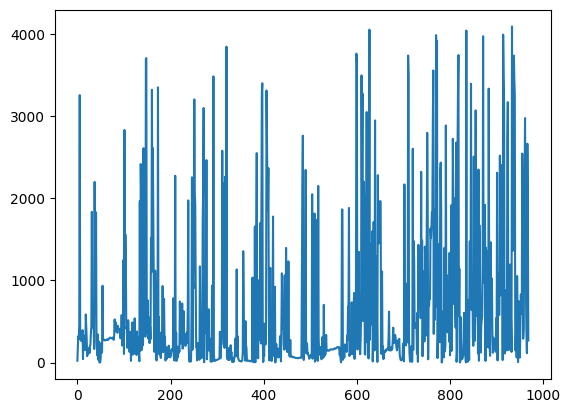

In [130]:
for i in range(0,2776): 
    ind_ini_3e01=fuel_raw_data_3e0.iloc[i,2].find('3E01')
    ind_fin_3e01=ind_ini_3e01+18    
    fuel_raw_data_3e0.iloc[i,3]=fuel_raw_data_3e0.iloc[i,2][ind_ini_3e01:ind_fin_3e01]
    msb=fuel_raw_data_3e0.iloc[i,3][10:12]
    lsb=fuel_raw_data_3e0.iloc[i,3][8:10]
    fuel_raw_data_3e0.iloc[i,3]=msb+lsb

fuel_raw_data_3e0.to_csv('/home/jlhb1984/py-projects/data/ransa/3E01.csv')
new_3e01=pd.read_csv('/home/jlhb1984/py-projects/data/ransa/3E01.csv')
new_3e01.dropna(inplace=True)
new_3e01.info()
new_3e01

new_3e01['Tank1_dec']='0'

new_3e01.info()

fuel_values=[]
for i in range(0,2722):
    new_3e01.iloc[i,5]=int(new_3e01.iloc[i,4],16)
    #print(new_3e01.iloc[i,5])
    if new_3e01.iloc[i,5]>0 and new_3e01.iloc[i,5]<4095:
        fuel_values.append(new_3e01.iloc[i,5])

print(fuel_values)
long=len(fuel_values)
print(long)
x_axis=[]

for i in range (0,long):
    x_axis.append(i)

print(max(fuel_values))
plt.plot(x_axis,fuel_values)


<class 'pandas.core.frame.DataFrame'>
Index: 2748 entries, 0 to 2775
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2748 non-null   int64 
 1   Created     2748 non-null   object
 2   Message     2748 non-null   object
 3   Status      2748 non-null   object
 4   Tank1       2748 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2748 entries, 0 to 2775
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2748 non-null   int64 
 1   Created     2748 non-null   object
 2   Message     2748 non-null   object
 3   Status      2748 non-null   object
 4   Tank1       2748 non-null   object
 5   Tank1_dec   2748 non-null   object
dtypes: int64(1), object(5)
memory usage: 150.3+ KB
[3280, 3253, 3358, 3281, 3278, 3270, 3265, 3327, 3276, 3254, 3265, 3234, 3299, 3202, 3228, 321

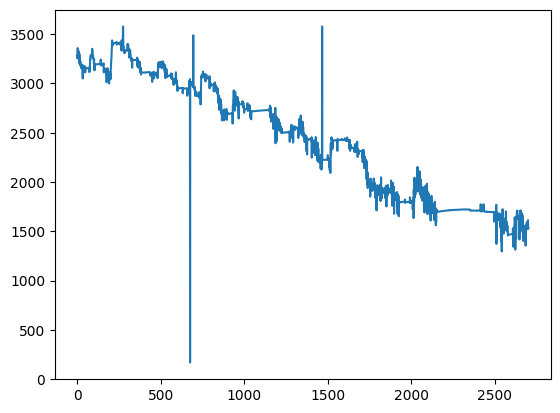

In [6]:
for i in range(0,2776): 
    ind_ini_3e01=fuel_raw_data_3e0.iloc[i,2].find('3E02')
    ind_fin_3e01=ind_ini_3e01+18    
    fuel_raw_data_3e0.iloc[i,3]=fuel_raw_data_3e0.iloc[i,2][ind_ini_3e01:ind_fin_3e01]
    msb=fuel_raw_data_3e0.iloc[i,3][10:12]
    lsb=fuel_raw_data_3e0.iloc[i,3][8:10]
    fuel_raw_data_3e0.iloc[i,3]=msb+lsb

fuel_raw_data_3e0.to_csv('/home/jlhb1984/py-projects/data/ransa/3E01.csv')
new_3e01=pd.read_csv('/home/jlhb1984/py-projects/data/ransa/3E01.csv')
new_3e01.dropna(inplace=True)
new_3e01.info()
new_3e01

new_3e01['Tank1_dec']='0'

new_3e01.info()

fuel_values=[]
for i in range(0,2722):
    new_3e01.iloc[i,5]=int(new_3e01.iloc[i,4],16)
    #print(new_3e01.iloc[i,5])
    if new_3e01.iloc[i,5]>0 and new_3e01.iloc[i,5]<4095:
        fuel_values.append(new_3e01.iloc[i,5])

print(fuel_values)
long=len(fuel_values)
print(long)
x_axis=[]

for i in range (0,long):
    x_axis.append(i)

print(max(fuel_values))
plt.plot(x_axis,fuel_values)
